## Assignment 2.1

$\mathbf{Exercise\, 1.}$ Illustrate with a meaningful example the bias variance decomposition, as we have seen it during lesson, for the non linear Support Vector Regression model, for increasing vaues of the regularization parameter _C_ (for example C = 1e-3, 1e-2, 1e-1, 1, 1e2, $\ldots$).


In [1]:
## sklearn call for Support Vector Regression with C = parameter_value
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
parameter_value = 1e-2

poly = SVR(kernel='rbf', C = parameter_value)



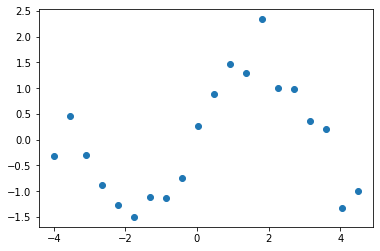

In [2]:
x_min = -4
x_max = 4.5
N_samples = 20

def f(x):
    return(np.sin(1*x))

def sample_data_batch(x_min,x_max, N_samples):
    ## The x-data is fixed (no variability here)
    X = np.linspace(x_min,x_max,N_samples)
    noise_level = 0.5
    noise = noise_level * np.random.randn(N_samples)
    ## The variability here depends only from the noise we add on the samples
    return [X,f(X) + noise]

x, y = sample_data_batch(x_min, x_max, N_samples)

plt.scatter(x,y)

The bias is  2.7412459824795303
The variance is  4.3968379102280775
Bias + variance is  7.138083892707607


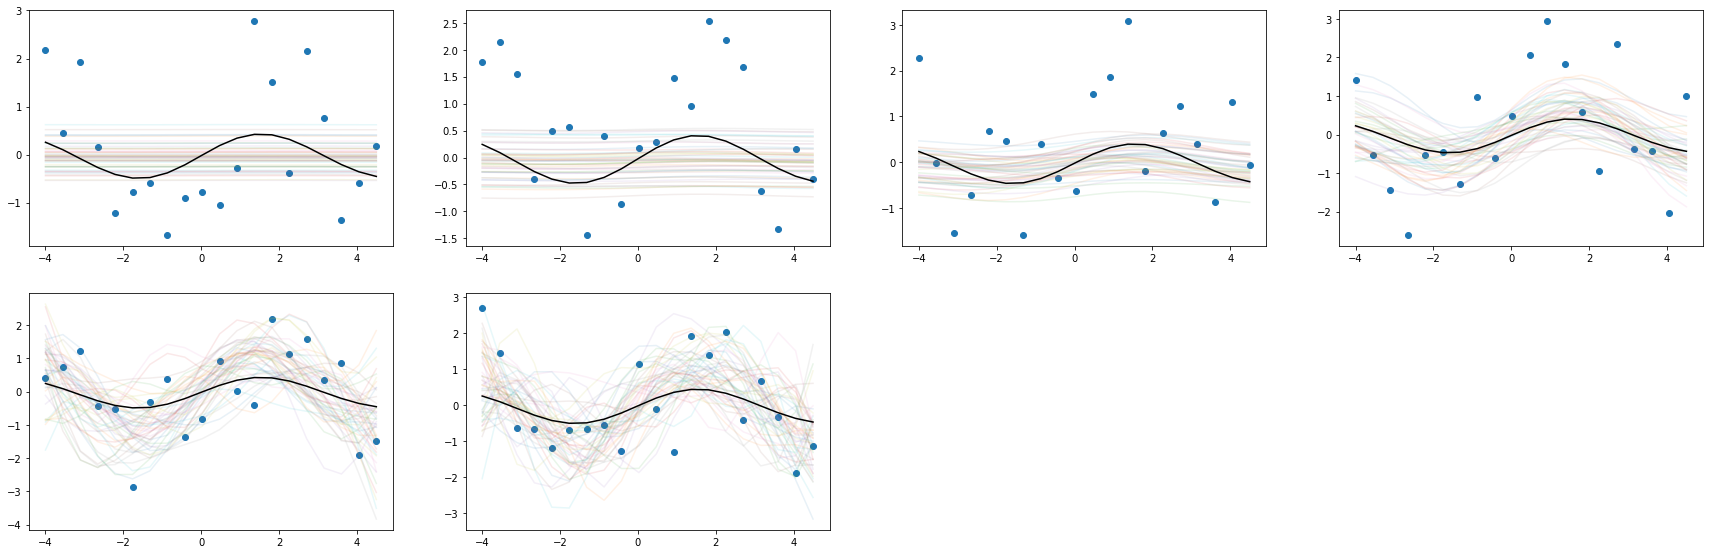

In [11]:
all_bias = []
all_variance = []
all_bias_variance = []
l = [1e-3, 1e-2, 1e-1, 1, 1e2, 1e3]
plt.figure(figsize=(30,20))
for c in range(len(l)):
    plt.subplot(4,4,c+1)
    for i in range(50):
        current_data = sample_data_batch(x_min,x_max, N_samples)
        x = current_data[0]
        y = current_data[1]
        x = x.reshape(-1,1)
        poly = SVR(kernel='rbf', C = l[c])
        poly.fit(x, y)
        prediction_on_data_sample.append(poly.predict(x))
        plt.plot(x, poly.predict(x), alpha = 0.1)
    X = np.linspace(x_min,x_max,N_samples)
    fx = f(X)
    expected_pred = np.mean(prediction_on_data_sample,0)
    plt.scatter(X,y)
    plt.plot(X, expected_pred, color='black')
    bias = np.sum((fx - expected_pred)**2)
    var_pred = np.var(prediction_on_data_sample,0)
    variance = np.sum(var_pred)
    all_bias.append(bias)
    all_variance.append(variance)
    all_bias_variance.append(bias + variance)
print("The bias is ", bias)
print("The variance is ", variance)
print("Bias + variance is ", bias+variance)
plt.show() 

$\mathbf{Exercise\, 2.}$ Modify the example of Exercise 1 to show the effect of increasing noise values on the bias and on the variance.

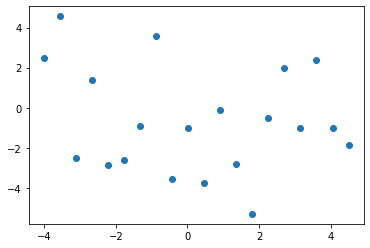

In [16]:
x_min = -4
x_max = 4.5
N_samples = 20

def f(x):
    return(np.sin(1*x))

def sample_data_batch(x_min,x_max, N_samples):
    ## The x-data is fixed (no variability here)
    X = np.linspace(x_min,x_max,N_samples)
    noise_level = 3
    noise = noise_level * np.random.randn(N_samples)
    ## The variability here depends only from the noise we add on the samples
    return [X,f(X) + noise]

x, y = sample_data_batch(x_min, x_max, N_samples)

plt.scatter(x,y)

The bias is  2.8608395392495116
The variance is  9.015755011962181
Bias + variance is  11.876594551211692


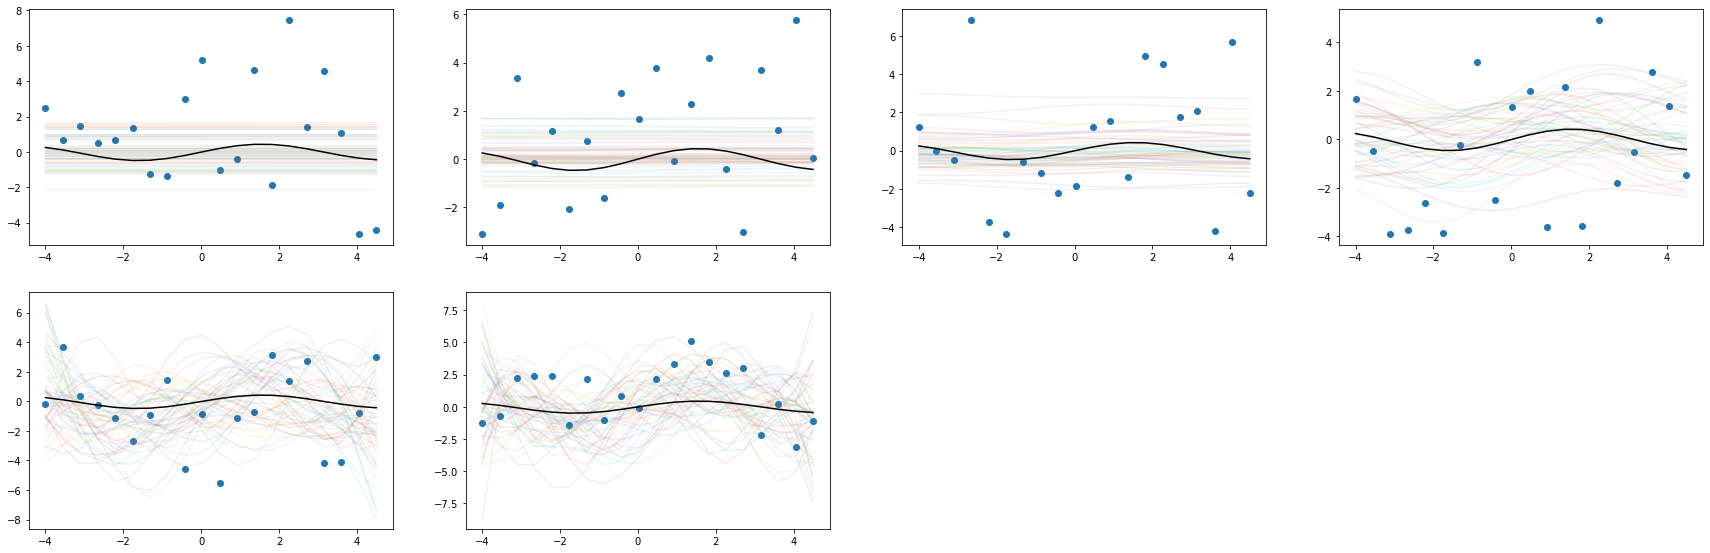

In [17]:
all_bias = []
all_variance = []
all_bias_variance = []
l = [1e-3, 1e-2, 1e-1, 1, 1e2, 1e3]
plt.figure(figsize=(30,20))
for c in range(len(l)):
    plt.subplot(4,4,c+1)
    for i in range(50):
        current_data = sample_data_batch(x_min,x_max, N_samples)
        x = current_data[0]
        y = current_data[1]
        x = x.reshape(-1,1)
        poly = SVR(kernel='rbf', C = l[c])
        poly.fit(x, y)
        prediction_on_data_sample.append(poly.predict(x))
        plt.plot(x, poly.predict(x), alpha = 0.1)
    X = np.linspace(x_min,x_max,N_samples)
    fx = f(X)
    expected_pred = np.mean(prediction_on_data_sample,0)
    plt.scatter(X,y)
    plt.plot(X, expected_pred, color='black')
    bias = np.sum((fx - expected_pred)**2)
    var_pred = np.var(prediction_on_data_sample,0)
    variance = np.sum(var_pred)
    all_bias.append(bias)
    all_variance.append(variance)
    all_bias_variance.append(bias + variance)
print("The bias is ", bias)
print("The variance is ", variance)
print("Bias + variance is ", bias+variance)
plt.show() 

$\mathbf{Exercise\, 3.}$ Still from the example of Exercise 1, compute the difference between training error and testing error for different values of the regularization parameter _C_. 

In [18]:
train_error = []
test_error = []
C = [1e-3, 1e-2, 1e-1, 1, 1e2, 1e3]
## Training and testing error for increasing polynomial degree
for c in range(len(C)):
    prediction_on_data_sample = []
    train_error_d = []
    test_error_d = []
    ## We compute the testing error for several (200) testing data
    for i in range(200):
        ## Generating a sample training dataset
        current_data = sample_data_batch(x_min,x_max, N_samples)
        ## Model training
        #x_poly = poly.fit_transform(current_data[0].reshape(-1,1))
        current_data[0] = current_data[0].reshape(-1,1)
        poly =  SVR(kernel='rbf', C = C[c])
        poly.fit(current_data[0], current_data[1])
        ## Generating a testing dataset
        testing_data = sample_data_batch(x_min,x_max, N_samples)
        x_test_poly = testing_data[0].reshape(-1,1)
        ## Computing the predictions on both training and testing data
        prediction_on_data_test = (poly.predict(x_test_poly))
        prediction_on_data_train = (poly.predict(current_data[0]))
        ## Storing the prediction errors for both training and testing data
        train_error_d.append(np.mean((current_data[1] - prediction_on_data_train)**2))
        test_error_d.append(np.mean((testing_data[1] - prediction_on_data_test)**2))
    train_error.append(np.mean(train_error_d))
    test_error.append(np.mean(test_error_d))



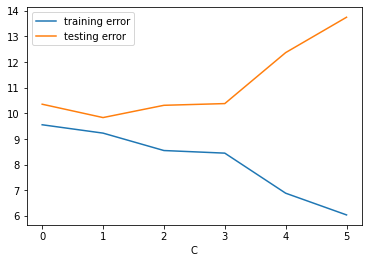

In [19]:
plt.plot(range(len(C)),train_error, label = 'training error')
plt.plot(range(len(C)),test_error, label = 'testing error')
plt.xlabel('C')
plt.legend()
plt.show()

## Assignment 2.2

We go back to the usual iris dataset

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# importing the data from sklearn
from sklearn.datasets import load_iris

# importing the data from sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# extracting the relevant information
data = iris_dataset.data
data_feature_names = iris_dataset.feature_names
target = iris_dataset.target
target_names = iris_dataset.target_names

$\mathbf{Exercise\, 1.}$ Using bootstrap, compute a 95% confidence interval for the median of the feature $\mbox{sepal length (cm)}$

In [9]:
x=data[:,0]
# 10 bootstrap repetitions 
B = 10
# We generate our bootstrap data by sampling **with replacement** from our data
bootstrap_sample = np.random.choice(x, size = [len(x),B] , replace = True)
print('The size of our bootstrap sample is' + str(bootstrap_sample.shape))

The size of our bootstrap sample is(150, 10)


In [10]:
boot_median = np.median(bootstrap_sample,0)

In [11]:
# We compute a 95% confidence interval for the bootstrap mean
alpha = .05
m = alpha/2 * B

# Identifying our lower and upper quantiles
low = np.sort(boot_median)[int(m)]
up = np.sort(boot_median)[int(B-m)]

print('The ' + str(100-alpha) + '% confidence interval for the mean is [' 
      + str(low) + ' , ' + str(up) + ']')

The 99.95% confidence interval for the mean is [5.5 , 6.0]


$\mathbf{Exercise\, 2.}$ Compute the null distribution for the hypothesis $H_0$: the mean of $\mbox{'sepal width (cm)'}$ is the same for $\mbox{setosa}$ and $\mbox{virginica}$. 

In [12]:
data_setosa= data[:50,1]  #Setosa data of the sepal width
data_versicolor= data[50:100,1] #Versicolor data of the sepal width
data_virginica= data[100:150,1] #Virginica data of sepal width

In [13]:
def compute_t(x,y):
    n = len(x)
    m = len(y)
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    sigma2_x = np.var(x)
    sigma2_y = np.var(y)

    return( (mean_x - mean_y)/np.sqrt(sigma2_x/n + sigma2_y/m))

compute_t(data_setosa,data_virginica)

6.515836546140517

$\mathbf{Exercise\, 3.}$ Compute a 2-sided bootstrapped p-value for the difference between the means of $\mbox{setosa}$ and $\mbox{virginica}$.

In [14]:
def boostrap_groups(x,y, B = 1):
    z = np.concatenate([x, y])
    diff_boostrap =np.empty(B)
    for i in range(B):
        permuted_data = np.random.choice(z, len(z), replace = True)
        perm_sample_1 = permuted_data[:len(x)]
        perm_sample_2 = permuted_data[len(x):]
        diff_boostrap[i] = np.mean(perm_sample_1) - np.mean(perm_sample_2)
    real_diff = np.mean(x) - np.mean(y)
    print('Avg x: ', np.mean(x))
    print('Avg y: ', np.mean(y))
    print('statistical test for the difference (p-value): ', np.sum(real_diff>diff_boostrap)/B)
    plt.hist(diff_boostrap, 25, histtype='step')
    plt.title('Null distribution')
    plt.axvline(x = real_diff)
    plt.show()

Avg x:  3.428
Avg y:  2.974
statistical test for the difference (p-value):  1.0


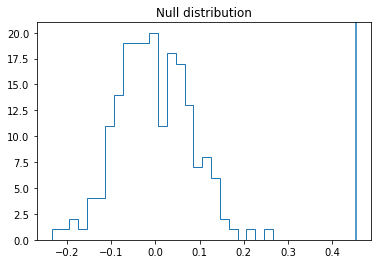

In [15]:
boostrap_groups(data_setosa,data_virginica,200) #there is no statistical relationship that exists between setosa and virginica sepal width 

$\mathbf{Exercise\, 4.}$ The central limit theorem (Lindeberg-Levy version) states that given a sequence $X_1, X_2, \ldots, X_n $ of independent variables drawn from the same ditribution, $X_i\sim F$, then:

$$ \sqrt{n} \left( \frac{1}{n} \sum X_i - \mu \right) \rightarrow \mathcal{N}(0,\sigma^2),$$

where $\mu = \mathbf{E}[F]$ and $\sigma^2 = Var(F)$.
In particular, the sample mean converges to the normal distribution:

$$ \frac{1}{n} \sum X_i \rightarrow \mathcal{N}(\mu,\frac{\sigma^2}{n}). $$

Let $F = Exponential(2)$ be the exponential distribution with parameter $\lambda = 2$, and let $X_1, X_2, \ldots, X_{20}$ be 20 samples from this distribution. Verify for this case the central limit theorem via bootstrapping. 

__**__ Remember, the mean of the exponential distribution is $\mathbf{E}(F) = 1/\lambda$, while the variance is $Var(F) = 1/\lambda^2$ __**__

Hint:

- Draw n samples (n large) from the Exponential distribution (be careful, when using $\mbox{np.random.exponential}$ the required input scale parameter is $\frac{1}{\lambda}$).
- Compute their average $\frac{\sum X_i}{20}$ and store the result

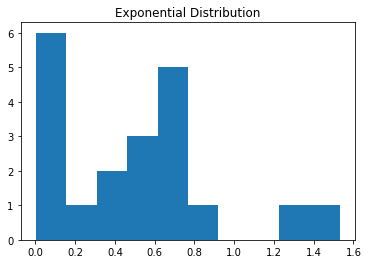

In [53]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


#fixing the seed for reproducibility of the result
np.random.seed(10)

size = 20
#drawing 20 samples from exponential distribution
sample = np.random.exponential(0.5, size)


plt.hist(sample) 
plt.title("Exponential Distribution") 
plt.show()

In [54]:
B=1000
means=[]
for i in range (B):
    x = np.random.choice(sample, size=300, replace=True)
    means.append(x.mean())    
len(means)

1000

(array([  9.,  32., 106., 227., 274., 213.,  95.,  33.,   8.,   3.]),
 array([0.42073059, 0.43651125, 0.45229192, 0.46807258, 0.48385325,
        0.49963391, 0.51541458, 0.53119524, 0.5469759 , 0.56275657,
        0.57853723]),
 <BarContainer object of 10 artists>)

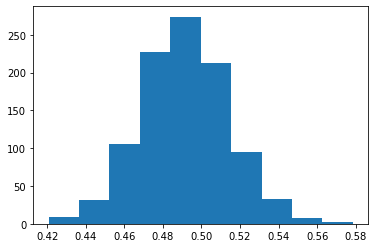

In [55]:
plt.hist(means)